Sample Rate: 44100
Data Shape: (2219424, 2)


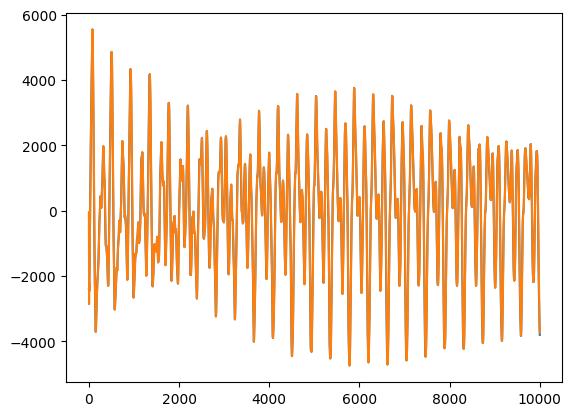

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.decomposition import PCA
import standalonePca
from scipy.signal import butter, lfilter


# Read the WAV file
sample_rate, data = wavfile.read("../data/yvette.wav")
mus_start = 60000
data = data[mus_start:]
l, r = data[:,0], data[:,1]

print(f"Sample Rate: {sample_rate}")
print(f"Data Shape: {data.shape}")  # This will show (num_samples,) for mono, (num_samples, num_channels) for stereo

def butter_lowpass_filter(data, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return lfilter(b, a, data)

cutoff_freq = 10000  # Adjust based on noise frequency
filtered_audio = butter_lowpass_filter(l, cutoff_freq, sample_rate)

ix_cut = 10000
plt.plot(l[:ix_cut])
plt.plot(filtered_audio[:ix_cut])
plt.show()


# algorithm approach

- sliding window over delay embedding matrix (kind of like SSA)

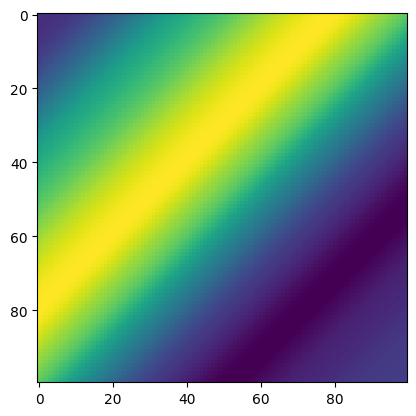

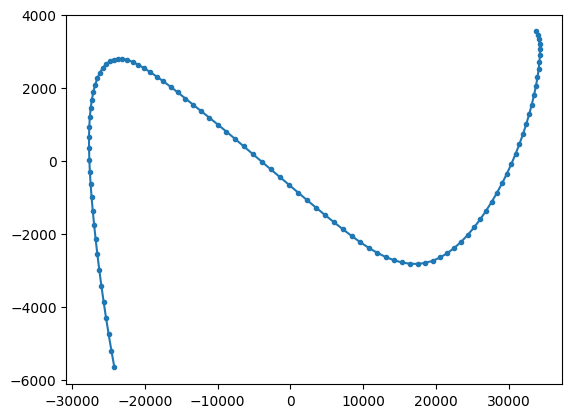

In [8]:
PCA_SOURCE = 'other'


if PCA_SOURCE == 'mine':
    PCA_FUNC = standalonePca.fit_transform
else:
    PCA_FUNC = PCA().fit_transform

wh = 100
window = np.zeros((wh, wh))

for t in range(1):
    sample = l[:wh*2]
    for i in range(wh):
        window[i, :] = sample[i:i+wh]

    plt.imshow(window)

    window_pca = PCA_FUNC(window)

plt.imshow(window)
plt.show()
plt.plot(window_pca[:, 0], window_pca[:, 2], '.-')
# plt.show()

# testing custom pca

In [3]:
import numpy as np
import standalonePca
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

In [4]:
pca_sk = PCA()

data = np.random.randn(100, 5).astype(np.float32)

pca_out_control = pca_sk.fit_transform(data)
pca_out_test = standalonePca.fit_transform(data)

assert np.testing.assert_array_almost_equal(pca_out_control, pca_out_test)


AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 263 / 500 (52.6%)
Max absolute difference among violations: 6.029028
Max relative difference among violations: 2.0000734
 ACTUAL: array([[-7.263085e-02, -2.314993e+00,  5.629646e-01,  9.442115e-01,
         1.605650e-01],
       [ 7.114574e-01,  9.118497e-01,  1.341863e+00,  8.008599e-03,...
 DESIRED: array([[ 7.263198e-02, -2.314993e+00, -5.629647e-01,  9.442125e-01,
         1.605669e-01],
       [-7.114577e-01,  9.118499e-01, -1.341862e+00,  8.007211e-03,...